<center>

<h1> Logical Foundations </h1>
<h2> CS3100 Monsoon 2020 </h2>
</center>

## Review

### Previously

* Prolog basics

### This lecture

* Logical foundations of prolog
  + First-order logic
    * Syntax, Semantics and properties
  + Definite Clause programs
    * Syntax, semantics, connection to prolog, SLD resolution

## First-order logic

Terms and functions:

\\[
\begin{array}{rcl}
\text{term} & := & \text{constant} ~\mid~ \text{variable} ~\mid~ \text{functions} \\
\text{functions} & := & f(t1,t2,...,tn) \mid g(t1,t2,....,tn) \\
          &    & \quad \text{where f and g are function symbols.} \\
          &    & \quad \text{where t1,t2... are terms.}
\end{array}
\\]
 
$
\newcommand{\s}[1]{\text{s}(#1)}
\newcommand{\mul}[2]{\text{mul}(#1,#2)}
\newcommand{\square}[1]{\text{square}(#1)}
%
\newcommand{\even}[1]{\text{even}(#1)}
\newcommand{\odd}[1]{\text{odd}(#1)}
\newcommand{\prime}[1]{\text{prime}(#1)}
\newcommand{\composite}[1]{\text{composite}(#1)}
\newcommand{\divides}[2]{\text{divides}(#1,#2)}
\newcommand{\gt}[2]{\text{gt}(#1,#2)}
\newcommand{\le}[2]{\text{le}(#1,#2)}
$

## Natural numbers

Consider the terms for encoding natural numbers $\mathbb{N}$.

* **Constant:** Let $z$ be $0$.
* **Functions**: Given the natural numbers $x$ and $y$, let the function 
  + $\s{x}$ represent the successor of $x$
  + $\mul{x}{y}$ represent the product of $x$ and $y$.
  + $\square{x}$ represent the square of $x$.

## First-order logic

\\[
\begin{array}{rcl}
t \in \text{term} & := & \text{constant} ~\mid~ \text{variable} ~\mid~ \text{functions} \\ \\
f,g \in \text{formulas} & :=   & p(t_1,\ldots,t_n) \quad \text{where } p \text{ is the predicate symbol} \\
                 & \mid & \neg f \mid f ~\wedge~ g \mid f ~\vee~ g \mid f \rightarrow g \mid f \leftrightarrow g \\
                 & \mid & \forall X.f \mid \exists X.f \quad \text{where } X \text{ is a variable}
\end{array}
\\]

## Predicates on natural numbers

* $\even{x}$ - the natural number $x$ is even.
* $\odd{x}$ - the natural number $x$ is odd.
* $\prime{x}$ - the natural number $x$ is prime.
* $\divides{x}{y}$ - the natural number $x$ divides $y$.
* $\le{x}{y}$ - the natural number $x$ is less than or equal to $y$
* $\gt{x}{y}$ - the natural number $x$ is greater than $y$. 

## Precedence

From strongest to weakest

1. $\neg$
2. $\vee$
3. $\wedge$
4. $\rightarrow, \leftrightarrow$
5. $\forall, \exists$

## Precedence

Hence,

\\[
((\neg b) ~\wedge~ c) \rightarrow a)
\\]

is equivalent to

\\[
\neg b ~\wedge~ c \rightarrow a
\\]

## Some statements on natural numbers

* Every natural number is even or odd, but not both.
  + $\forall x. (\even{x}~\vee~ \odd{x}) \wedge \neg(\even{x} ~\wedge~ \odd{x})$
* A natural number is even if and only if it is divisible by two.
  + $\forall x. \even{x} \leftrightarrow \divides{2}{x}$
* If some natural number, $x$, is even, then so is $x^2$.
  + $\forall x. \even{x} \rightarrow \even{\square{x}}$

## Some statements on natural numbers

* A natural number $x$ is even if and only if $x+1$ is odd.
  + $\forall x. \even{x} \leftrightarrow \odd{\s{x}}$
* Any prime number that is greater than 2 is odd.
  + $\forall x. \prime{x} ~\wedge~ \gt{x}{\s{\s{z}}} \rightarrow \odd{x}$
* For any three natural numbers 𝑥, 𝑦, and 𝑧, if 𝑥 divides 𝑦 and 𝑦 divides 𝑧, then 𝑥 divides 𝑧.
  + $\forall x,y,z. \divides{x}{y} ~\wedge~ \divides{y}{z} \rightarrow \divides{x}{z}$

## Some statements on natural numbers.

* There exists an odd composite (not prime) number.
  + $\exists x. \odd{x} ~\wedge~ \composite{x}$
* Every natural number greater than one has a prime divisor.
  + $\forall x. \gt{x}{\s{z}} \rightarrow (\exists p. \prime{p} ~\wedge~ \divides{p}{x})$

## Logical Equivalences

\\[
\begin{array}{rcl}
\neg \neg f & \equiv & f \\
f \rightarrow g & \equiv & \neg f \vee g \\
f \leftrightarrow g & \equiv & (f \rightarrow g) \wedge (g \rightarrow f)\\
\neg (f \vee g) & \equiv & \neg f \wedge \neg g \\
\neg (f \wedge g) & \equiv & \neg f \vee \neg g \\
\neg \forall x. f(x) & \equiv & \exists x. \neg f(x) \\
\neg \exists x. f(x) & \equiv & \forall x. \neg f(x) \\
\end{array}
\\]

## Logical Equivalences

\\[
\begin{array}{rcl}
\forall x.(f(x) \wedge g(x)) & \equiv & (\forall x.f(x)) \wedge (\forall x.g(x)) \\
\forall x.(f(x) \vee g(x)) & \not \equiv & (\forall x.f(x)) \vee (\forall x.g(x)) \\
\end{array}
\\]

Pick $f$ as $even$ and $g$ as $odd$.

\\[
\begin{array}{rcl}
\forall x.(\even{x} \vee \odd{x}) & \not \equiv & (\forall x.\even{x}) \vee (\forall x.\odd{x}) \\
\end{array}
\\]

LHS is valid, RHS is not.

## Logical Equivalences

\\[
\begin{array}{rcl}
\exists x.(f(x) \vee g(x)) & \equiv & (\exists x.f(x)) \vee (\exists x.g(x)) \\
\exists x.(f(x) \wedge g(x)) & \not \equiv & (\exists x.f(x)) \wedge (\exists x.g(x)) \\
\end{array}
\\]

Pick $f$ as $even$ and $g$ as $odd$.

\\[
\begin{array}{rcl}
\exists x.(\even{x} \wedge \odd{x}) & \not \equiv & (\exists x.\even{x}) \wedge (\exists x.\odd{x}) \\
\end{array}
\\]

RHS is valid, LHS is not.

## Inference rules

\\[
\begin{array}{cccc}
\displaystyle{\frac{f \quad f \rightarrow g}{g}} & (\rightarrow E) &
\qquad \displaystyle{\frac{\forall x. f(x)}{f(t)}} & (\forall E) \\ \\
\displaystyle{\frac{f(t)}{\exists x. f(x)}} & (\exists I) & 
\qquad \displaystyle{\frac{f \quad g}{f \wedge g}} & (\wedge I) 
\end{array}
\\]

## Definition: Interpretation

* What we have seen so far is a syntactic study of first-order logic.
  + **Semantics = meaning** of first-order logic formulas.
* Given an alphabet $A$ from which terms are drawn from and a domain $\mathcal{D}$, an **interpretation** maps:
  + each constant $c \in A$ to an element in $\mathcal{D}$
  + each $n$-ary function $f \in A$ to a function $\mathcal{D}^n \rightarrow \mathcal{D}$
  + each $n$-ary predicate $p \in A$ to a relation $D_1 \times \ldots \times D_n$

## Interpretation

For our running example, choose the domain of natural numbers $\mathbb{N}$ with

* The constant $z$ maps to $0$.
* The function $\s{x}$ maps to the function $\s{x} = x+1$
* The predicate $~\text{le}~$ maps to the relation $\leq$

## Definition: Models

* A **model** for a set of first-order logic formulas is equivalent to the assignment to truth variables in predicate logic.
  + $A \wedge B$ is _satisfiable_ with $A = true$ and $B = true$.
* An interpretation $M$ for a set of first-order logic formulas $P$ is a _model_ for $P$ iff every formula of $P$ is true in $M$.
* If $M$ is a model for $f$, we write $M \models f$, which is read as "models" or "satisfies".


## Models

Take $f = \forall y.\le{z}{y}$. The following are models for $f$

* Domain $\mathbb{N}$, $z$ maps to $0$, $\s{x}$ maps to $\s{x} = x + 1$ and $~\text{le}~$ maps to $\leq$.
* Domain $\mathbb{N}$, $z$ maps to $0$, $\s{x}$ maps to $\s{x} = x + 2$ and $~\text{le}~$ maps to $\leq$.
* Domain $\mathbb{N}$, $z$ maps to $0$, $\s{x}$ maps to $\s{x} = x$ and $~\text{le}~$ maps to $\leq$.

## Models

Take $f = \forall y.\le{z}{y}$. The following are **not** models for $f$

* The integer domain $\mathbb{Z}$, $z$ maps to $0$, $\s{x}$ maps to $\s{x} = x + 1$ and $~\text{le}~$ maps to $\leq$.
  + $\forall y \in \mathbb{Z}. 0 \leq y$ does not hold; pick $y = -1$. 
* Domain $\mathbb{N}$, $z$ maps to $0$, $\s{x}$ maps to $\s{x} = x + 1$ and $~\text{le}~$ maps to $\geq$
  + $\forall y \in \mathbb{N}. 0 \geq y$ does not hold; pick $y = 1$.

## Quiz

Which of these interpretations are models of $f= \forall y.le(z,y)$?

1. Domain $\mathbb{N} \setminus \{0\}$, $z$ maps to 1, $s(x)$ maps to $s(x) = x+1$ and le maps to $\leq$.
2. Domain $\mathbb{N} \setminus \{0\}$, $z$ maps to 1, $s(x)$ maps to $s(x) = x*2$ and le maps to $\leq$.
3. Domain $\mathbb{N}$, $z$ maps to 0, $s(x)$ maps to $s(x) = x + 1$ and le maps to $<$.

## Quiz

Which of these interpretations are models of $f= \forall y.le(z,y)$?

1. Domain $\mathbb{N} \setminus \{0\}$, $z$ maps to 1, $s(x)$ maps to $s(x) = x+1$ and le maps to $\leq$. **yes**
2. Domain $\mathbb{N} \setminus \{0\}$, $z$ maps to 1, $s(x)$ maps to $s(x) = x*2$ and le maps to $\leq$. **yes**
3. Domain $\mathbb{N}$, $z$ maps to 0, $s(x)$ maps to $s(x) = x + 1$ and le maps to $<$. **no**

## Models

* A set of forumulas $P$ is said to be **satisfiable** if there is a model $M$ for $P$.
* Some formulas do not have models. Easiest one is $f \wedge \neg f$
  + Such (set of) formulas are said to be **unsatisfiable**.

## Definition: Validity 
  
A formula $f$ is said to be **valid**, if it is true in every model (written as $\models f$).

_Validity_ of $f$ is usually proved by showing that $\neg f$ is _unsatisfiable_.

**Theorem:** It is undecidable whether a given first-order logic formula $f$ is **valid**.

## Can we do better?

* Clearly, the full first-order logic is not a practical model for computation as it is undecidable. 
  + How can we do better?
* Restrict the language such that the language is **semi-decidable**.

## Definition: Semi-decidability

* A language $L$ is said to be **decidable** if there exists a turing machine that 
  + accepts every string in L and
  + rejects every string not in L
* A language $L$ is said to be **semi-decidable** if there exists a turing machine that
  + accepts every string in L and
  + for every string not in L, rejects it or loops forever.

## Definite logic programs

* Definite clauses are such a restriction on first-order logic that is semi-decidable. 
* Prolog is basically programming with definite clauses. 
* In order to define definite clauses formally, we need some auxiliary definitions.

## Definition: Clauses

* An **atomic forumla** is a formula without connectives.
  + $\even{x}$ and $\prime{x}$ 
  + but not $\neg \even{x}$, $\even{x} \vee \prime{y}$
* A **clause** is a first-order logic formula of the form $\forall(L_1 \vee \ldots \vee L_n)$, where every $L_i$ is an atomic formula (a postive literal) or the negation of an atomic formula (a negative literal).

## Definition: Definite clauses

* A **definite clause** is a clause with exactly one positive literal.
  + $\forall(A_0 \vee \neg A_1 \ldots \vee \neg A_n)$
  + Usually written down as, $A_0 \leftarrow A_1 \wedge \ldots \wedge A_n$, for $n \geq 0$.
  + or more simply, $A_0 \leftarrow A_1, \ldots, A_n$, for $n \geq 0$.
* A **definite program** is a finite set of definite clauses.

## Definite Clauses and Prolog

* Prolog facts are definite clauses with no negative literals.
  + The prolog fact `even(z)` is equivalent to 
  + the definite clause $\forall z. \even{z} \leftarrow \top$, where $\top$ stands for true. 
* Prolog rules are definite clauses.
  + The prolog rule `ancestor(X,Y) :- parent(X,Z), ancestor(Z,Y)` is equivalent to 
  + the definite clause $\forall x,y,z. \text{ancestor}(x,y) \leftarrow \text{parent}(x,z) ~\wedge~ \text{ancestor}(z,y)$
  + which is equivalent to, $\forall x,y. \text{ancestor}(x,y) \leftarrow \exists z. \text{parent}(x,z) ~\wedge~ \text{ancestor}(z,y)$

## Consistency of Definite Clause Programs

* Every definite clause program has a model!
* Proof sketch
  + there is no way to encode negative information in definite clause programs.
    - Cannot encode "1 is _not_ an even number"
  + Hence, there is no way to construct an inconsistent system (such as $f \wedge \neg f$).
    - "1 is an even number" and "1 is _not_ an even number"
  + Therefore, every definite clause program has a model.

## Models for Logic Programs

* Every definite clause program has a model
  + How do we compute this model?
  + Why? In order to provide a semantics for logic program.

<center>
    <h1> More Definitions! :-( </h1>
</center>

## Definition: Herbrand Universe

Given a logic program $P$, the Herbrand universe of the logic program $U(P)$ is the set of all ground terms that can be formed from the constants and function symbols in $P$. 

For our encoding of natural numbers, with the constant $z$ and the function $s(x)$, the Herbrand universe is $\{z,s(z),s(s(z)),\ldots\}$.
  
* If there are no function symbols, the Herbrand universe is finite.
* If there are no constants, add an arbitrary constant to form the Herbrand universe.

## Definition: Herbrand Base

* The Herbrand base, denoted by $B(P)$ is the set of all ground goals that can be formed from the predicates in $P$ and the terms of the Herbrand universe.
* For our encoding of natural numbers, let $\even{x}$ be the only predicate.
  + Then, $B(P) = \{\even{z},\even{s(z)},\ldots\}$.
* Herbrand base is infinite if Herbrand universe is.

## Herbrand Interpretation

* Interpretation of a logic program is the subset of the Herbrand base.
* An interpretation assigns true or false to elements of the Herbrand base.
  + A goal is true if it belongs to the interpretation.

## Definition: Herbrand model

**Model:** A model $M$ of a logic program is an interpretation such that for all _ground instantiations_ of the form $A \leftarrow B_1, B_2, \ldots, B_n$, if $B_1$ to $B_n$ belongs to $M$, then $A$ belongs to $M$.

A ground instantiation of a formula is where all the variable are instantiated.

Let the logic progam be

```prolog
even(z).
even(s(s(X)) :- even(X).
```

A Herbrand model of this program includes $\{\even{z},\even{s(s(z))},\ldots\}$.

## Herbrand Model

* But the Herbrand model may also include elements from $S = \{\even{s(z)}, \even{s(s(s(z)))},\ldots\}$.
  + Mathematicians should really use constructive defintions :-/ 
* Observations
  + Herbrand base of a definite program P always is a Herbrand model of the program.
  + There are an infinite number of Herbrand models if the Herbrand base is infinite. 

## Least Herbrand Model

* Hence, we define a Least Herbrand model, which is the intersection of every Herbrand model.
  + Least Herbrand Model does not include elements from $S$.
* Least Herbrand Model **precisely** defines the declarative meaning of the logic program.
  + Every logic program has a least Herbrand model.

## Quiz

Given a language $S$ with constants `robb`, `rickard` and `ned`, predicates `father/2` and `ancestor/2`, and facts `father(rickard,ned)` and `father(ned,robb)`, and rules `ancestor(X,Y) :- father(X,Y)` and `ancestor(X,Y) :- father(X,Z), ancestor(Z,Y)` which of these statements are true?
1. Herbrand Universe $U(S)$ is infinite. 
2. Herbrand Base $B(S)$ is finite. 
3. `father(ancestor(robb))` $\in B(S)$.
4. $\exists M$ such that `father(ned,ned)` $\in M$, where $M$ is a Herbrand model of the program. 
5. $\exists M$ such that `father(ned,ned)` $\in M$, where $M$ is the least Herbrand model of the program.

## Quiz

Given a language $S$ with constants `robb`, `rickard` and `ned`, predicates `father/2` and `ancestor/2`, and facts `father(rickard,ned)` and `father(ned,robb)`, and rules `ancestor(X,Y) :- father(X,Y)` and `ancestor(X,Y) :- father(X,Z), ancestor(Z,Y)` which of these statements are true?

1. Herbrand Universe $U(S)$ is infinite. **false (no functions)**
2. Herbrand Base $B(S)$ is finite. **true (no functions)**
3. `father(ancestor(robb))` $\in B(S)$. **false (arity mismatch)**
4. $\exists M$ such that `father(ned,ned)` $\in M$, where $M$ is a Herbrand model of the program. **true**
5. $\exists M$ such that `father(ned,ned)` $\in M$, where $M$ is the least Herbrand model of the program. **false**

## Answering Prolog Queries

* Least Herbrand Model is only used to discuss semantics
  + Not used for computation by Prolog.
* How does prolog compute the answers to queries?

## Prolog Queries

* Let us assume that the prolog program $P$ is family tree of House Stark encoded in the previous lecture. 
* We would like to answer "is Rickard the ancestor of Robb?"
  + $q = \text{ancestor}(rickard,robb)$
* We construct a logical statement
  + $\neg \text{ancestor}(rickard,robb)$
  + which is the **negation** of the original question.

## Prolog Queries

* The system attempts to show that $\neg \text{ancestor}(rickard,robb)$ is false in every model of $P$.
  + equivalent to showing $P \cup \{\neg \text{ancestor}(rickard,robb)\}$ is unsatisfiable.
* Then, we can conclude that for every model $M$ of $P$, $M \models q$.
  + that is, "Rickard is the ancestor of Robb".

## SLD Resolution

* The whole point of restricting the first-order logic language to definite clauses is to have a better decision procedue.
* There is a **semi-decidable** decision procedure for definite clauses called **SLD resolution**.
  + SLD = Selective Linear Resolution with Definite Clauses.
  + given an unsatisfiable set of formulae it is guaranteed to derive false
  + however given a satisfiable set, it may never terminate.
    - Prolog has non-termination!

## SLD Resolution example

```prolog
father(rickard,ned).
father(rickard,brandon).
father(rickard,lyanna).
father(ned,robb).
father(ned,sansa).
father(ned,arya).
parent(X,Y) :- father(X,Y).
ancestor(X,Y) :- parent(X,Y).
ancestor(X,Y) :- parent(X,Z), ancestor(Z,Y).
?- ancestor(rickard, robb).
```

## SLD Resolution example

* The logical version goal is $\neg \text{ancestor(rickard,robb)}$.
* The system attemps to disprove this by **finding a counter-example**.
  + How can I derive `ancestor(rickard,robb)`?
* I can see a rule `ancestor(X,Y) :- parent(X,Y)` which allows me to derive `ancestor(X,Y)`.
  + the logical equivalent is, $\forall x,y.ancestor(x,y) \leftarrow parent(x,y)$.
* **Deduce**: 
  + Apply $(\forall E)$ rule for $x$ and $y$ and pick $x = rickard$ and $y = robb$.
  + Apply $(\rightarrow E)$ rule on the result to get a new goal $parent(rickard,robb)$.
* The original goal to derive `ancestor(rickard,robb)` has been replaced by the goal to derive `parent(rickard,robb)`. 

## SLD Resolution example

* How can you derive `parent(rickard,robb)`?
* Observe the rule `parent(X,Y) :- father(X,Y)`
  + logical equivalent is $\forall x,y. parent(x,y) \leftarrow father(x,y)$.
* **Deduce**: Apply rules $(\forall E)$ and $(\rightarrow E)$.
* New goal: `father(rickard,robb)`.
* No fact matches this goal!
  + **Backtrack!**

## SLD Resolution example

* How can I derive `ancestor(rickard, robb)`?
* Observe the rule `ancestor(X,Y) :- parent(X,Z), ancestor(Z,Y)`
  + logical equivalent is $\forall x,y. ancestor(x,y) \leftarrow \exists z. parent(x,z) \wedge ancestor(z,y)$
* **Deduce**: Apply rules $(\forall E), (\rightarrow E), (\exists I), (\wedge E)$ in that order.
* We get two new goals, `parent(rickard,Z)` and `ancestor(Z,robb)` where `Z` is the same variable introduced by $(\exists I)$.

## SLD Resolution example

* The goal `parent(rickard,Z)` in turn leads to the goal `father(rickard,Z)`.
  + The first rule `father(rickard,ned)` unifies with this goal with `Z = ned`.
  + Hence, the first goal is proved.
* The other goal is now specialised to `ancestor(ned,robb)`.
* The second goal can now be proved as `ancestor(ned,robb)` $\leftarrow$ `parent(ned,robb)` $\leftarrow$ `father(ned,robb)`.
  + We have a fact `father(ned,robb)`. Hence, proved.

## SLD Resolution example

* By deriving `q = ancestor(rickard,robb)` from the given program $P$, we have shown that $P \cup \{\neg q\}$ is unsatisfiable. 
* Hence, `ancestor(rickard,robb)` is a logical consequence of the given program $P$.

## Computation is deduction

* When a prolog program computes the result of the query, it is performing logical deduction through SLD resolution. 
* In our example,
  1. We picked the clauses in the order they appear in the program
  2. Did a depth-first search for proof
  3. Given the conjunction of goals $g1 \wedge g2$, chose to prove $g1$ first. 
* SWI-Prolog implementation has the same behaviour
  + Other prolog implementation may choose different strategies BFS instead of DFS, pick last conjunct in a conjunction of goals, etc.

## Tracing in SWI-Prolog

```
father(rickard,ned).
father(rickard,brandon).
father(rickard,lyanna).
father(ned,robb).
father(ned,sansa).
father(ned,arya).
parent(X,Y) :- father(X,Y).
ancestor(X,Y) :- parent(X,Y).
ancestor(X,Y) :- parent(X,Z), ancestor(Z,Y).
?- ancestor(rickard, robb).
```

# Tracing in SWI-Prolog

<br/>
<center>
    
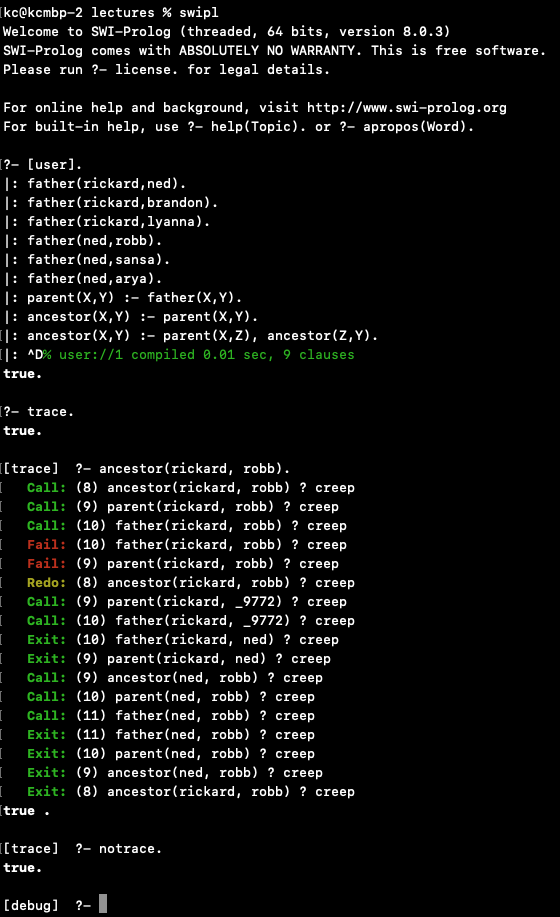
</center>

<center>

<h1> Fin. </h1>
</center>